# 1.1 Prise en main

In [64]:
# coding: utf-8

#%% =========== Illustration de LDA et QDA ====
# Application sur les donnees Iris
# =============================================
#from __future__ import print_function
#from __future__ import division

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

plt.close('all')

#%% ==== Trace de frontiere de decision en 2D
def plot_regions_decision_2d(X, y, classifier, resolution=0.02, titre=' '):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 0, X[:, 0].max() + 0
    x2_min, x2_max = X[:, 1].min() - 0, X[:, 1].max() + 0
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.figure()
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.6, c=cmap(idx),
                    marker=markers[idx], label= 'classe {}'.format(cl))
    plt.legend(loc='best')
    plt.title(titre, fontsize=12)
    
# %% ### Dataset : IRIS (inclus dans Sklearn)
# Caractéristiques : 150 points, 4 variables, 3 classes
# chargement des donnees
iris = datasets.load_iris()
X, Y = iris.data, iris.target
print('Nombre de points : {}'.format(X.shape[0]))
print('Nombre de variables : {}'.format(X.shape[1]))
print('Nombre de classes : {}'.format(len(np.unique(Y))))
classes, nbpoints = np.unique(Y, return_counts=True)
for i, lab in enumerate(classes):
    print('Classe {} comprend {} points'.format(lab, nbpoints[i]))


Nombre de points : 150
Nombre de variables : 4
Nombre de classes : 3
Classe 0 comprend 50 points
Classe 1 comprend 50 points
Classe 2 comprend 50 points


In [65]:
#%% ### Utilisation de LDA et QDA
# Remarque : la normalisation des donnees, le decoupage apprentissage/validation/test 
# sont omis dans ce exemple

# LDA
clf_lda = LinearDiscriminantAnalysis(solver='svd', store_covariance = True)
clf_lda.fit(X, Y)
Y_lda = clf_lda.predict(X)
err_lda = sum(Y_lda != Y)/Y.size
print('LDA : taux d''erreur = {}%'.format(100*err_lda))

LDA : taux derreur = 2.0%


### 1. Commenter et expliquer les différentes étapes de ce programme

Cette partie du code utilise l'analyse discriminante linéaire (LDA) à l'aide de la classe LinearDiscriminantAnalysis
de la bibliothèque scikit-learn:

clf_lda = LinearDiscriminantAnalysis(solver='svd', store_covariance=True) :
Crée une instance de la classe LinearDiscriminantAnalysis avec certains paramètres.

Le paramètre solver='svd' spécifie la méthode de résolution basée sur la décomposition 
en valeurs singulières .

Le paramètre store_covariance=True indique que les covariances intra-classes doivent être stockées 
pour une utilisation ultérieure.

In [66]:
# QDA
clf_qda = QuadraticDiscriminantAnalysis(store_covariance = True)
clf_qda.fit(X, Y)
print(clf_qda.means_)
Y_qda = clf_qda.predict(X)
err_qda = sum(Y_qda!= Y)/Y.size
print('QDA : taux d''erreur = {}%'.format(100*err_qda))




[[5.006 3.428 1.462 0.246]
 [5.936 2.77  4.26  1.326]
 [6.588 2.974 5.552 2.026]]
QDA : taux derreur = 2.0%


 Cette partie du code utilise l'analyse discriminante quadratique (QDA) à l'aide de la classe QuadraticDiscriminantAnalysis de la bibliothèque scikit-learn:



clf_qda = QuadraticDiscriminantAnalysis(store_covariance=True) :
Crée une instance de la classe QuadraticDiscriminantAnalysis avec le paramètre store_covariance=True, ce qui indique que les covariances intra-classes doivent être stockées pour une utilisation ultérieure.


clf_qda.fit(X, Y) :
Ajuste le modèle QDA aux données d'entraînement (X : les caractéristiques, Y : les étiquettes de classe).

print(clf_qda.means_) :
Affiche les moyennes des caractéristiques pour chaque classe. Ces moyennes sont calculées lors de l'apprentissage du modèle.


Y_qda = clf_qda.predict(X) :
Prédit les étiquettes de classe pour les données d'entraînement à l'aide du modèle QDA ajusté.


err_qda = sum(Y_qda != Y)/Y.size :
Calcule le taux d'erreur en comparant les étiquettes prédites (Y_qda) avec les véritables étiquettes (Y).

Y_qda != Y renvoie un tableau de booléens indiquant où les prédictions diffèrent des véritables étiquettes.

sum(Y_qda != Y) compte le nombre d'erreurs.

En divisant par Y.size, on obtient le taux d'erreur normalisé.

print('QDA : taux d''erreur = {}%'.format(100*err_qda)) :
Affiche le taux d'erreur résultant de l'application de QDA sur les données d'entraînement.

Le taux d'erreur est exprimé en pourcentage.

In [67]:
#ParametresestimesparLDA

print('centre des matrices lda:',"\n")
print(clf_lda.means_) 

print('matrices de covariance lda:',"\n")
print(clf_lda.covariance_) 


#ParametresestimesparQDA
print('centre des matrices qda:',"\n")
print(clf_qda.means_) 

print('matrices de covariance qda:',"\n")
print(clf_qda.covariance_)

centre des matrices lda: 

[[5.006 3.428 1.462 0.246]
 [5.936 2.77  4.26  1.326]
 [6.588 2.974 5.552 2.026]]
matrices de covariance lda: 

[[0.259708   0.09086667 0.164164   0.03763333]
 [0.09086667 0.11308    0.05413867 0.032056  ]
 [0.164164   0.05413867 0.181484   0.041812  ]
 [0.03763333 0.032056   0.041812   0.041044  ]]
centre des matrices qda: 

[[5.006 3.428 1.462 0.246]
 [5.936 2.77  4.26  1.326]
 [6.588 2.974 5.552 2.026]]
matrices de covariance qda: 

[array([[0.12424898, 0.09921633, 0.0163551 , 0.01033061],
       [0.09921633, 0.1436898 , 0.01169796, 0.00929796],
       [0.0163551 , 0.01169796, 0.03015918, 0.00606939],
       [0.01033061, 0.00929796, 0.00606939, 0.01110612]]), array([[0.26643265, 0.08518367, 0.18289796, 0.05577959],
       [0.08518367, 0.09846939, 0.08265306, 0.04120408],
       [0.18289796, 0.08265306, 0.22081633, 0.07310204],
       [0.05577959, 0.04120408, 0.07310204, 0.03910612]]), array([[0.40434286, 0.09376327, 0.3032898 , 0.04909388],
       [0.09376

### 2. Afficher les centres et matrices de covariance de la LDA et QDA. Que constatez-vous ?

 On remarque qu'on obtient une même  matrice de covariance dans le cadre de la lda 
et on obtient trois matrices de covariance pour la qda


In [68]:
clf_lda.coef_

array([[  6.31475846,  12.13931718, -16.94642465, -20.77005459],
       [ -1.53119919,  -4.37604348,   4.69566531,   3.06258539],
       [ -4.78355927,  -7.7632737 ,  12.25075935,  17.7074692 ]])

In [69]:
clf_lda.intercept_

array([-15.47783673,  -2.02197415, -33.53768674])

### 3. Visualiser les frontières décision des deux méthodes en dé-commentant les lignes appropriées. Commenter

C:\Users\diele\AppData\Local\Temp\ipykernel_17460\3559408937.py:41: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
C:\Users\diele\AppData\Local\Temp\ipykernel_17460\3559408937.py:41: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


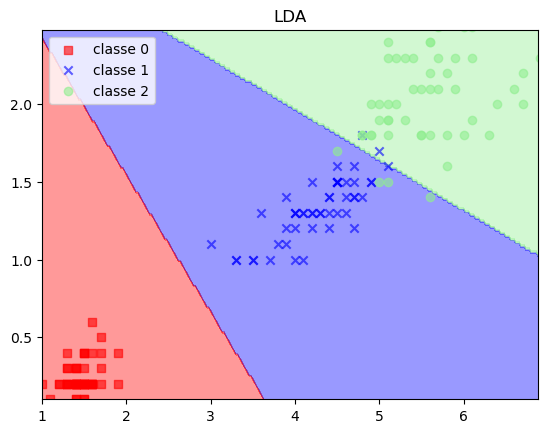

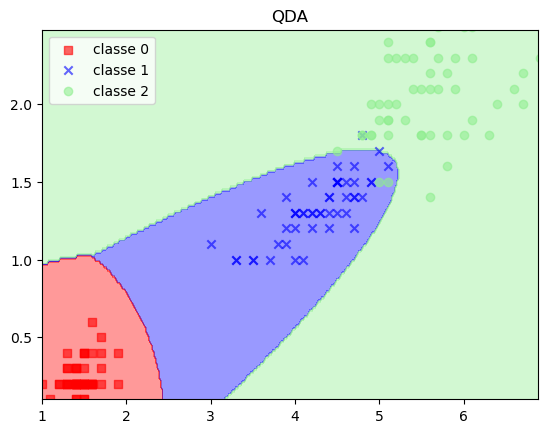

In [70]:
#%% ### Trace de la frontiere de decision en 2D
# Utilisation de 2 variables choisies parmi les 4. 
#On fait le modele LDA et QDA que pour ces variables

variables = [2, 3]
## on ne fait ceci que pour le trace de la frontiere de decision de la LDA et QDA en 2D
classifieur = 'LDA'
clf_lda.fit(X[:,variables], Y) 
plot_regions_decision_2d(X[:,variables], Y, clf_lda, 0.02, titre='LDA')
clf_qda.fit(X[:,variables], Y) 
plot_regions_decision_2d(X[:,variables], Y, clf_qda, 0.02, titre='QDA')

l'analyse discriminante linéaire a des frontières linéaires, tandis que 
l'analyse discriminante quadratique a des frontières quadratiques et est donc plus flexible.
l'analyse discriminante quadratique arrive a mieux  regroupé les éléments en classe 1 par exemple  que l'analyse discriminante linéaire.

## 1.2 Classification binaire

In [71]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### 1. Chargement  des données 

In [72]:
df = pd.read_csv("./CTGSimple.csv", sep="\t",header=1)
Y = df["NSP"].values
variables = ["LB","AC.1","FM.1","UC.1","DL.1","DS.1","DP.1","ASTV",
"MSTV","ALTV","MLTV", "Width","Min","Max","Nmax", "Nzeros","Mode","Mean","Median","Variance","Tendency"]
X = df[variables].values
df.head()

,b,e,AC,FM,UC,DL,DS,DP,DR,LB,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,240,357,0,0,0,0,0,0,0,120,...,-1,-1,-1,-1,-1,-1,1,-1,9,2
1,5,632,4,0,4,2,0,0,0,132,...,-1,-1,-1,1,-1,-1,-1,-1,6,1
2,177,779,2,0,5,2,0,0,0,133,...,-1,-1,-1,1,-1,-1,-1,-1,6,1
3,411,1192,2,0,6,2,0,0,0,134,...,-1,-1,-1,1,-1,-1,-1,-1,6,1
4,533,1147,4,0,5,0,0,0,0,132,...,-1,-1,-1,-1,-1,-1,-1,-1,2,1


### 2. Analyse statistique des données

 La normalisation est necessaire pour  mettre les variables à la même échelle.

Classe 1 contient 1655 points
Classe 2 contient 295 points
Classe 3 contient 176 points


<Axes: >

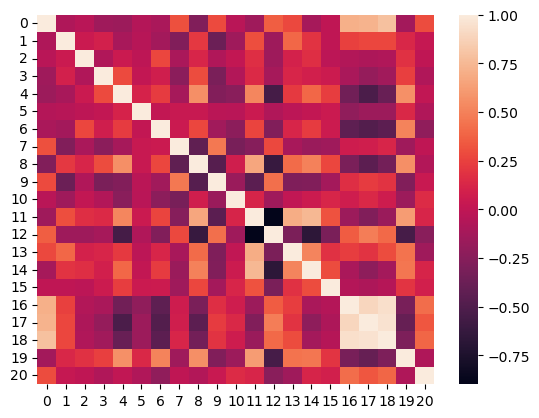

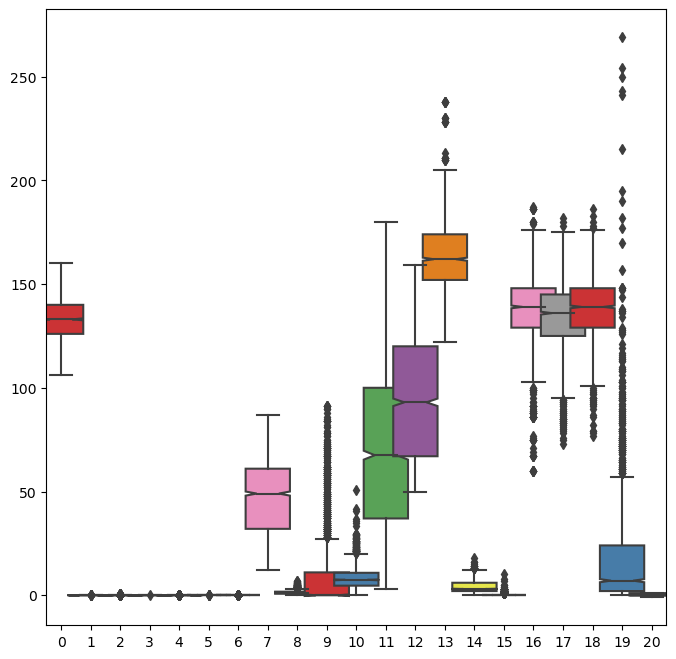

In [73]:
uniqLabels, counts = np.unique(Y, return_counts=True)

for i, lab in enumerate(uniqLabels):
    print( "Classe {} contient {} points".format(lab, counts[i]))
    
corr_mat = np.corrcoef(X.T)
sb.heatmap(corr_mat)
# tracer des boxplot
fig, ax = plt.subplots(figsize=(8,8))
sb.boxplot(X, orient="v", palette="Set1",width=1.5,notch=True,ax=ax)


### Dans la suite on va transformer le problème en un problème de classification binaire en fusionnant les classes 2 et 3 en une seule.

In [74]:
classe = 3
Y[np.in1d(Y, classe)] = 2

### 3. Séparation des données  en deux ensembles : apprentissage et test

In [75]:
Xa, Xt, Ya, Yt = train_test_split(X, Y, shuffle=True, test_size=0.5,stratify=Y)

l'utilisation de shuffle=True garantit que les données sont mélangées avant la division, et l'utilisation de stratify=Y garantit que la distribution des classes est maintenue entre les ensembles d'apprentissage et de test.

### 4.On va  centrer et réduire les données (le jeu d’apprentissage sert de référence)

In [76]:
sc = StandardScaler(with_mean=True, with_std=True)
sc = sc.fit(Xa)
Xa = sc.transform(Xa)
Xt = sc.transform(Xt)

Est-il conseiller de faire l’enchaînement d’instructions suivantes pour la normalisation :
sc = sc.fit(Xa) ; Xa = sc.transform(Xa) ; sc = sc.fit(Xt) ; Xt = sc.transform(Xt) ? Pourquoi
?
Parce que si on normalise les données avant de séparer, les moyennes et les écart type de chaque variables seront 
caculés sur l'ensemble de toutes les données et donc le jeux de données sera influencé.

### 5. Réalisation  d'une classification par la LDA, puis la QDA

In [77]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# LDA
clf_lda = LinearDiscriminantAnalysis(solver='svd', store_covariance=True)
clf_lda.fit(Xa, Ya)
Y_lda_train = clf_lda.predict(Xa)
Y_lda_test = clf_lda.predict(Xt)
err_lda_train = sum(Y_lda_train != Ya) / Ya.size
err_lda_test = sum(Y_lda_test != Yt) / Yt.size
print('LDA sur données d\'apprentissage: taux d\'erreur = {:.2%}'.format(err_lda_train))
print('LDA sur données de test: taux d\'erreur = {:.2%}'.format(err_lda_test))

# QDA
clf_qda = QuadraticDiscriminantAnalysis(store_covariance=True)
clf_qda.fit(Xa, Ya)
Y_qda_train = clf_qda.predict(Xa)
Y_qda_test = clf_qda.predict(Xt)
err_qda_train = sum(Y_qda_train != Ya) / Ya.size
err_qda_test = sum(Y_qda_test != Yt) / Yt.size
print('QDA sur données d\'apprentissage: taux d\'erreur = {:.2%}'.format(err_qda_train))
print('QDA sur données de test: taux d\'erreur = {:.2%}'.format(err_qda_test))


LDA sur données d'apprentissage: taux d'erreur = 9.60%
LDA sur données de test: taux d'erreur = 11.29%
QDA sur données d'apprentissage: taux d'erreur = 17.87%
QDA sur données de test: taux d'erreur = 17.50%


C:\ProgramData\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


C:\Users\diele\AppData\Local\Temp\ipykernel_17460\3559408937.py:41: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
C:\Users\diele\AppData\Local\Temp\ipykernel_17460\3559408937.py:41: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


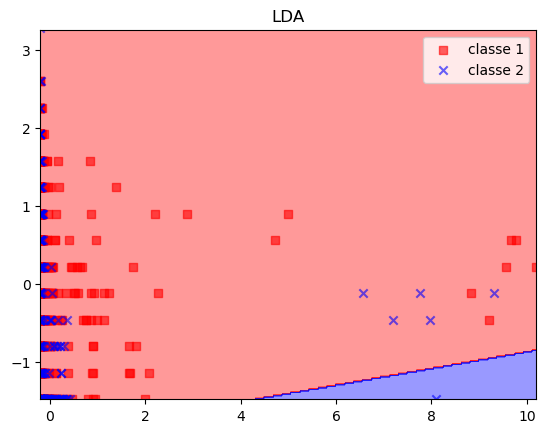

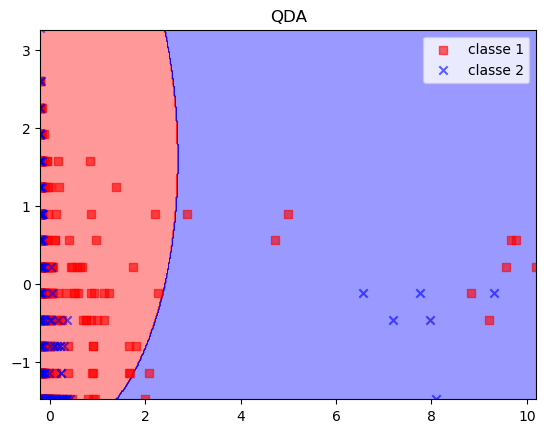

In [78]:
variables = [2, 3]
# on ne fait ceci que pour le trace de la frontiere de decision de la LDA et QDA en 2D
classifieur = 'LDA'
clf_lda.fit(Xa[:,variables], Ya) 
plot_regions_decision_2d(Xa[:,variables], Ya, clf_lda, 0.02, titre='LDA')
clf_qda.fit(Xa[:,variables], Ya) 
plot_regions_decision_2d(Xa[:,variables], Ya, clf_qda, 0.02, titre='QDA')

## 1.3 Cas multi-classe : données Mnist 

#### 1. Chargement des données

In [80]:
import scipy.io as sio

# Chargement des données
digits_app = sio.loadmat("mnist-app.mat")
# Correction ici: utiliser digits_app au lieu de mat_digits_app
Xa, Ya = digits_app["Xa"], digits_app["Ya"][:,0]

digits_test = sio.loadmat("mnist-test.mat")
Xt, Yt = digits_test["Xt"], digits_test["Yt"][:,0]

#### 2.Faire une analyse statistique sur les données d’apprentissage. Que constatez-vous sur la variance des variables ?

In [81]:
import scipy.io as sio

# Chargement des données
digits_app = sio.loadmat("mnist-app.mat")

Xa, Ya = digits_app["Xa"], digits_app["Ya"][:,0]

digits_test = sio.loadmat("mnist-test.mat")
Xt, Yt = digits_test["Xt"], digits_test["Yt"][:,0]


In [82]:

import seaborn as sns


In [83]:
# Valeurs uniques et leur nombre dans Xa
valeurs_uniques_Xa, compte_Xa = np.unique(Xa, return_counts=True)
print("Valeurs uniques dans Xa et leur nombre :")
for valeur, compte in zip(valeurs_uniques_Xa, compte_Xa):
    print(f"Valeur {valeur}: {compte} fois")

# Valeurs uniques et leur nombre dans Ya
valeurs_uniques_Ya, compte_Ya = np.unique(Ya, return_counts=True)
print("\nValeurs uniques dans Ya et leur nombre :")
for valeur, compte in zip(valeurs_uniques_Ya, compte_Ya):
    print(f"Classe {valeur}: {compte} exemples")

Valeurs uniques dans Xa et leur nombre :
Valeur 0: 38045844 fois
Valeur 1: 22896 fois
Valeur 2: 33653 fois
Valeur 3: 36040 fois
Valeur 4: 38267 fois
Valeur 5: 39148 fois
Valeur 6: 37692 fois
Valeur 7: 38856 fois
Valeur 8: 30878 fois
Valeur 9: 38234 fois
Valeur 10: 35282 fois
Valeur 11: 36020 fois
Valeur 12: 30139 fois
Valeur 13: 40100 fois
Valeur 14: 26939 fois
Valeur 15: 28869 fois
Valeur 16: 29115 fois
Valeur 17: 27551 fois
Valeur 18: 26849 fois
Valeur 19: 34431 fois
Valeur 20: 29955 fois
Valeur 21: 35496 fois
Valeur 22: 26750 fois
Valeur 23: 22910 fois
Valeur 24: 25950 fois
Valeur 25: 29995 fois
Valeur 26: 24260 fois
Valeur 27: 24025 fois
Valeur 28: 25434 fois
Valeur 29: 37160 fois
Valeur 30: 22913 fois
Valeur 31: 26205 fois
Valeur 32: 28890 fois
Valeur 33: 15556 fois
Valeur 34: 19906 fois
Valeur 35: 21516 fois
Valeur 36: 22128 fois
Valeur 37: 24760 fois
Valeur 38: 25922 fois
Valeur 39: 18250 fois
Valeur 40: 20675 fois
Valeur 41: 27023 fois
Valeur 42: 22349 fois
Valeur 43: 21227 foi

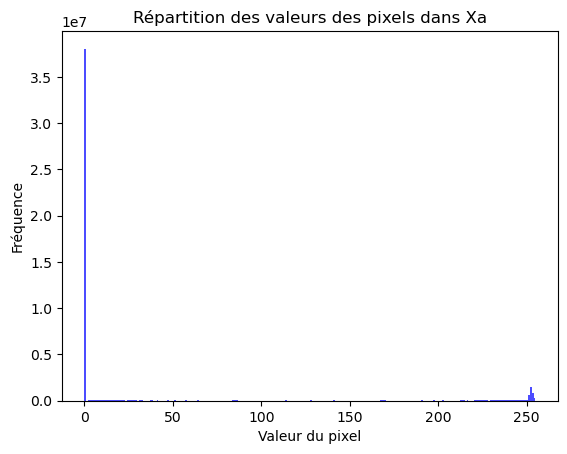

In [84]:
# Histogramme de la répartition des valeurs dans Xa
plt.hist(Xa.flatten(), bins=256, range=[0,255], color='blue', alpha=0.7)
plt.title('Répartition des valeurs des pixels dans Xa')
plt.xlabel('Valeur du pixel')
plt.ylabel('Fréquence')
plt.show()

In [85]:

mean_pixels = np.mean(Xa, axis=0)
variance_pixels = np.var(Xa, axis=0)

# Affichage des moyennes et variances pour chaque pixel
for i in range(len(mean_pixels)):
    print(f"Pixel {i}: Moyenne = {mean_pixels[i]}, Variance = {variance_pixels[i]}")


Pixel 0: Moyenne = 0.0, Variance = 0.0
Pixel 1: Moyenne = 0.0, Variance = 0.0
Pixel 2: Moyenne = 0.0, Variance = 0.0
Pixel 3: Moyenne = 0.0, Variance = 0.0
Pixel 4: Moyenne = 0.0, Variance = 0.0
Pixel 5: Moyenne = 0.0, Variance = 0.0
Pixel 6: Moyenne = 0.0, Variance = 0.0
Pixel 7: Moyenne = 0.0, Variance = 0.0
Pixel 8: Moyenne = 0.0, Variance = 0.0
Pixel 9: Moyenne = 0.0, Variance = 0.0
Pixel 10: Moyenne = 0.0, Variance = 0.0
Pixel 11: Moyenne = 0.0, Variance = 0.0
Pixel 12: Moyenne = 0.0021, Variance = 0.2259289233333334
Pixel 13: Moyenne = 0.007833333333333333, Variance = 1.8528053055555558
Pixel 14: Moyenne = 0.0036, Variance = 0.7775870400000003
Pixel 15: Moyenne = 0.00015, Variance = 0.0013499775000000006
Pixel 16: Moyenne = 0.0, Variance = 0.0
Pixel 17: Moyenne = 0.0, Variance = 0.0
Pixel 18: Moyenne = 0.0, Variance = 0.0
Pixel 19: Moyenne = 0.0, Variance = 0.0
Pixel 20: Moyenne = 0.0, Variance = 0.0
Pixel 21: Moyenne = 0.0, Variance = 0.0
Pixel 22: Moyenne = 0.0, Variance = 0.0


Dimensions des données d'apprentissage: (60000, 784)
Dimensions des données de test: (10000, 784)


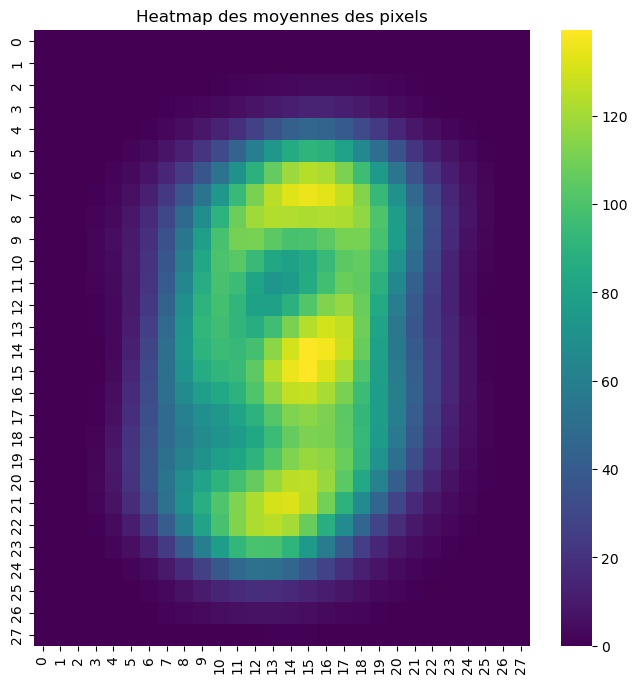

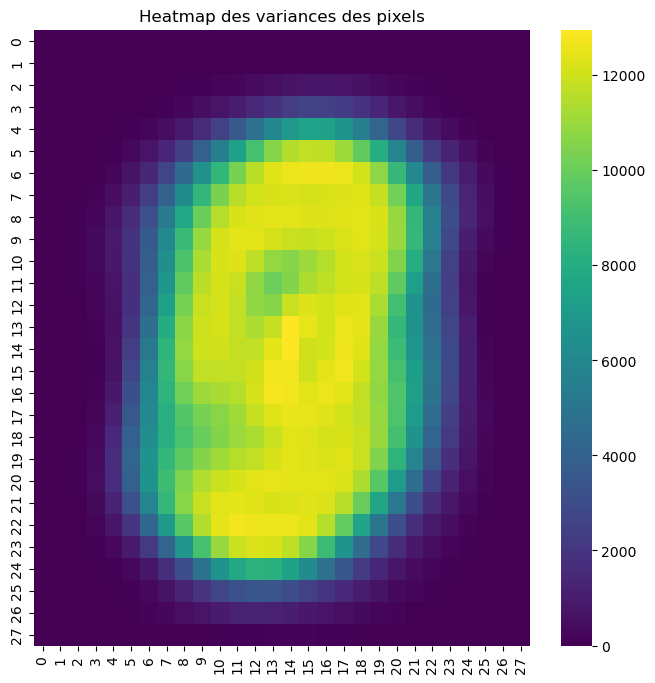

In [86]:
# Chargement des données
digits_app = sio.loadmat("mnist-app.mat")
Xa, Ya = digits_app["Xa"], digits_app["Ya"][:,0]
digits_test = sio.loadmat("mnist-test.mat")
Xt, Yt = digits_test["Xt"], digits_test["Yt"][:,0]

# Analyse exploratoire des données
print("Dimensions des données d'apprentissage:", Xa.shape)
print("Dimensions des données de test:", Xt.shape)



# Statistiques descriptives pour chaque pixel
mean_pixels = np.mean(Xa, axis=0)
variance_pixels = np.var(Xa, axis=0)


# Visualisation des moyennes et variances sous forme de heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(mean_pixels.reshape(28, 28), annot=False, cmap='viridis')
plt.title('Heatmap des moyennes des pixels')
plt.show()

plt.figure(figsize=(8, 8))
sns.heatmap(variance_pixels.reshape(28, 28), annot=False, cmap='viridis')
plt.title('Heatmap des variances des pixels')
plt.show()

#### Pour la suite de l’étude, on va retenir les variables dont la variance vérifie  un seuil à choisir.

In [87]:
tol = 1e-3
std_a = np.std(Xa, 0)
idx_var = np.squeeze(np.where(std_a > tol))
Xa = Xa[:, idx_var]
Xt = Xt[:, idx_var]

In [90]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
# Centrer et réduire les variables
scaler = StandardScaler()
Xa_scaled = scaler.fit_transform(Xa)
Xt_scaled = scaler.transform(Xt)

# Apprentissage du modèle LDA
lda = LDA()
lda.fit(Xa_scaled, Ya)

# Prédiction et évaluation des performances
pred_train = lda.predict(Xa_scaled)
pred_test = lda.predict(Xt_scaled)

# Calcul du taux d'erreur
error_rate_train = 1 - accuracy_score(Ya, pred_train)
error_rate_test = 1 - accuracy_score(Yt, pred_test)

print(f"Taux d'erreur sur les données d'apprentissage : {error_rate_train}")
print(f"Taux d'erreur sur les données de test : {error_rate_test}")

Taux d'erreur sur les données d'apprentissage : 0.1285166666666666
Taux d'erreur sur les données de test : 0.127


Comparaison entre l'apprentissage et le test : La différence entre les taux d'erreur d'apprentissage et de test est relativement faible (0.15%). Cela suggère que le modèle n'est pas en surapprentissage (overfitting).

 Un taux d'erreur d'environ 12.7% - 12.85% peut être considéré comme modérément bon pour un problème de classification multi-classes comme MNIST, en fonction de la complexité du modèle et des caractéristiques des données.